## Detection of COVID-19 Cases from Chest X-Ray Images

##### Based on COVID-NET: https://github.com/lindawangg/COVID-Net
###### And 
##### COVID-NET IN KERAS: https://github.com/busyyang/COVID-19


* In order to download the dataset of images and create test and train folder, run:  create_dataset.ipynb
* Training process is faster runnig from a python file than a jupyter notebook, so from terminal run: python train.py
    * Training process last 50 h approximately in a NVIDIA 8117MiB
* Files for traininig and test accuracy and loss history are saved as csv as well as true and predicted y
* Model is saved as model.h5
* Then this jupyter notebook is used to visualize results 

In [1]:
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from os import path


Using TensorFlow backend.


#### Load results and history files as CSV 

In [8]:
loss_his  = pd.read_csv('loss_his.csv', header=None)
pred_test = pd.read_csv('pred_test2.csv', header=None)
hist_accuracy = pd.read_csv('hist_accuracy.csv', header=None)
true_test = pd.read_csv('true_test2.csv', header=None)
loss_test  = pd.read_csv('loss_test2.csv', header=None)
hist_accuracy_test = pd.read_csv('hist_accuracy_test.csv', header=None)


#### Plot confusion matrix

array([823,  51,  11, 118, 458,  18,  11,   2,  18])

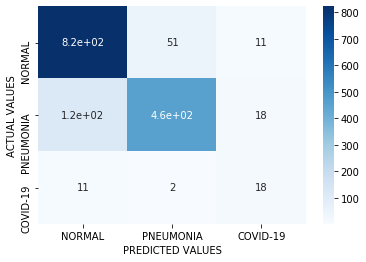

In [3]:
from sklearn.metrics import confusion_matrix 

matrix = confusion_matrix(true_test[0], pred_test[0])

df = pd.DataFrame(matrix, columns=["NORMAL","PNEUMONIA","COVID-19"])
 
df.index = ["NORMAL","PNEUMONIA","COVID-19"]
plt.figure()
p1 = sn.heatmap(df,cmap="Blues", annot=True)
plt.ylabel("ACTUAL VALUES")
plt.xlabel("PREDICTED VALUES")

confusion_matrix(true_test[0], pred_test[0]).ravel()

### Plot training and test loss

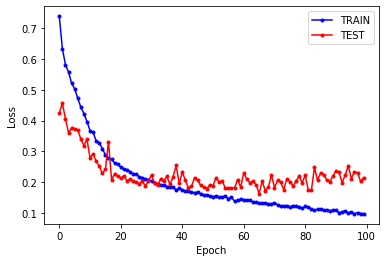

In [35]:
plt.plot(range(len(loss_his)),loss_his, linestyle='-', marker='.', color='b')
plt.plot(range(len(loss_test)),loss_test, linestyle='-', marker='.', color= 'r')
plt.legend(("TRAIN","TEST"))
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

### Plot test and traing Accuracy history

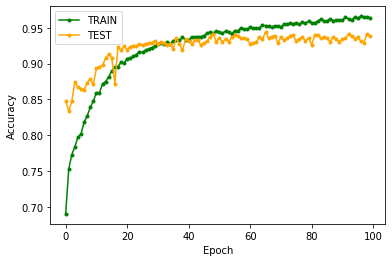

In [36]:
plt.plot(range(len(hist_accuracy)),hist_accuracy, linestyle='-', marker='.', color='g')
plt.plot(range(len(hist_accuracy_test)),hist_accuracy_test, linestyle='-', marker='.', color='orange')
plt.legend(("TRAIN","TEST"))
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()


In [ ]:
class_acc = [matrix[i,i]/np.sum(matrix[i,:]) if np.sum(matrix[i,:]) else 0 for i in range(len(matrix))]
print('Sens Normal: {0:.3f}, Pneumonia: {1:.3f}, COVID-19: {2:.3f}'.format(class_acc[0],
                                                                             class_acc[1],
                                                                             class_acc[2]))
ppvs = [matrix[i,i]/np.sum(matrix[:,i]) if np.sum(matrix[:,i]) else 0 for i in range(len(matrix))]

print('PPV Normal: {0:.3f}, Pneumonia {1:.3f}, COVID-19: {2:.3f}'.format(ppvs[0],

                                                                            ppvs[1],
                                                                             ppvs[2]))